___
___

# IoT Firmware Visuals
This notebook plots random firmware thumbnail pictures in the visuals folder.

## Imports & Installs

In [1]:
import pickle as pickles
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt

from matplotlib import rcParams
from skimage.io import collection as coll


## Settings & Functions

In [2]:
# Set global parameters
rcParams['figure.figsize'] = (9, 9)
rcParams['figure.facecolor'] = 'whitesmoke'
rcParams['figure.titlesize'] = 'x-large'
np.random.seed(42)

In [3]:
# Create a class with pic processing methods
class picWrangler:
    # Function to get picture paths
    def picPath(self, p):
        paths = coll.glob(p)
        return paths
    
    # Pic plotting function
    def picPlot(self, pic, title = 'Sample'):
        plt.figure(figsize = (7, 7))
        plt.imshow(pic, cmap = 'gray')
        plt.axis('off')
        plt.title(title)

    # Function for loading images
    def picLoader(self, f, shape = (32, 32)):
        pic = io.imread(f).astype(np.float64)
        if np.shape(pic) == shape:
            return pic
        else:
            return np.resize(pic, shape)

# Instantiate the class
wrangler = picWrangler()

---
## Load Images

In [4]:
# Get path to image folders
path = '../input/iot-firmware-image-classification/imagery/'
paths = wrangler.picPath(path + '*')

# Get class names from image folders
classes = [pth.split('/')[-1] for pth in paths]

print(f'\nClasses:\n    {classes}')


Classes:
    ['hackware', 'gray', 'benignware', 'malware']


In [5]:
# Associate names and picture collections
im_colls = {}
for clss in classes:
    im_colls[clss] = coll.ImageCollection(path + str(clss) + '/*', 
                                    load_func = wrangler.picLoader)

with open('image_collections', 'wb') as f:
    pickles.dump(im_colls, f)
    f.close()

im_colls

{'hackware': <skimage.io.collection.ImageCollection at 0x7f4fe6c08650>,
 'gray': <skimage.io.collection.ImageCollection at 0x7f4fe6c050d0>,
 'benignware': <skimage.io.collection.ImageCollection at 0x7f4fd988c890>,
 'malware': <skimage.io.collection.ImageCollection at 0x7f4fd991fc10>}

In [6]:
# Find the pic shapes
print('Classes & Picture Shapes:\n')
for clss in classes:
    idx = np.random.randint(100)
    print(f'    {clss} ---> {np.shape(im_colls[clss][idx])}')


Classes & Picture Shapes:

    hackware ---> (32, 32)
    gray ---> (32, 32)
    benignware ---> (32, 32)
    malware ---> (32, 32)


---
# View Images

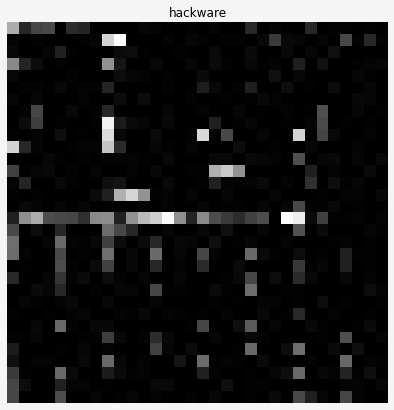

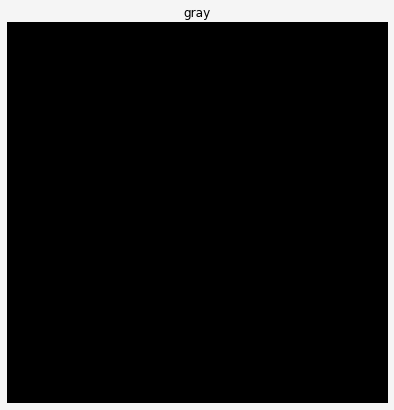

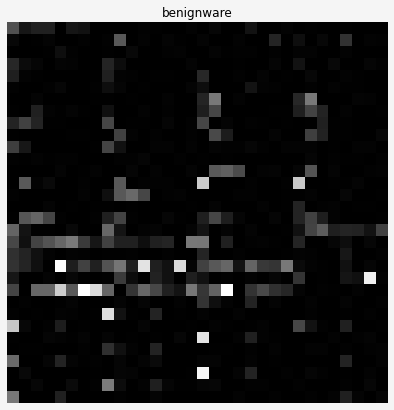

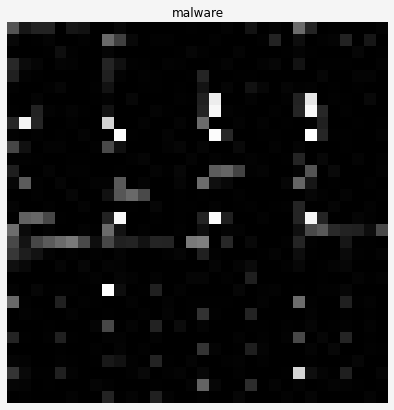

In [7]:
# Random sample pictures from each class
for clss in classes:
    wrangler.picPlot(im_colls[clss][np.random.randint(100)], 
                     title = clss)
    

## Multiple Plots

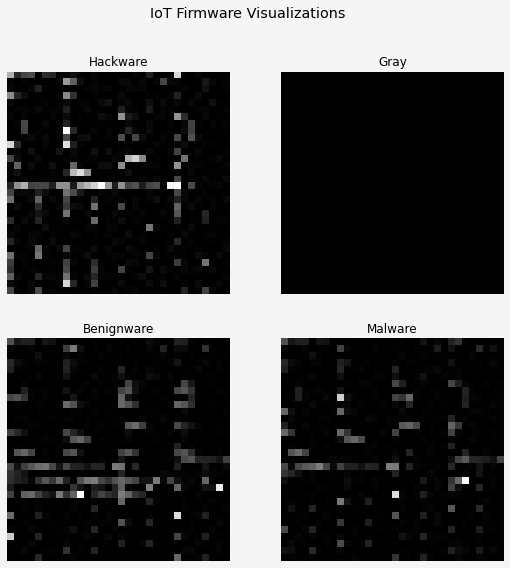

In [8]:
fig, (ax0, ax1) = plt.subplots(2, 2)
fig.tight_layout = True
plt.suptitle('IoT Firmware Visualizations')
ax0[0].imshow(im_colls[classes[0]][np.random.randint(100)], cmap = 'gray')
ax0[0].set_title(classes[0].capitalize())
ax0[0].axis('off')
ax0[1].imshow(im_colls[classes[1]][np.random.randint(100)], cmap = 'gray')
ax0[1].set_title(classes[1].capitalize())
ax0[1].axis('off')
ax1[0].imshow(im_colls[classes[2]][np.random.randint(100)], cmap = 'gray')
ax1[0].set_title(classes[2].capitalize())
ax1[0].axis('off')
ax1[1].imshow(im_colls[classes[3]][np.random.randint(100)], cmap = 'gray')
ax1[1].set_title(classes[3].capitalize())
ax1[1].axis('off')
_ = plt.show()

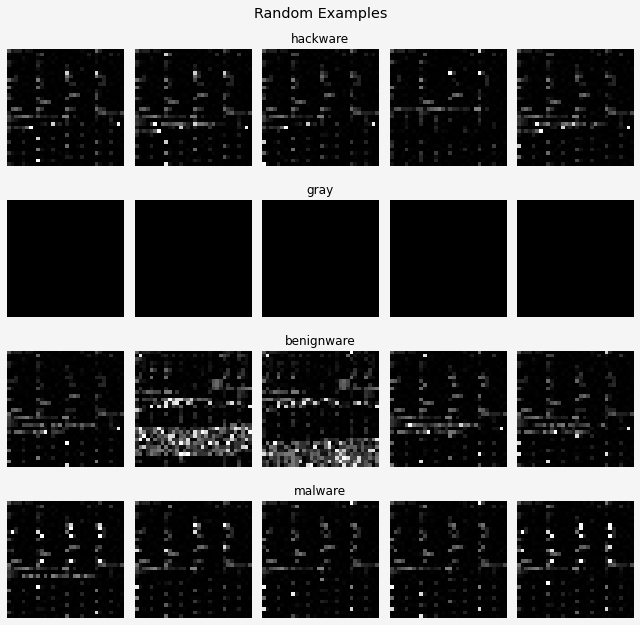

In [9]:
fig = plt.figure(tight_layout = True)
fig.suptitle('Random Examples')
j = 0

for i in range(20):
    if i == 5 or i == 10 or i == 15:
        j +=1
    clss = classes[j]
    idx = np.random.randint(100)
    plt.subplot(4, 5, i + 1)
    plt.imshow(im_colls[clss][idx], cmap = 'gray')
    if (i == 2 or i == 7) or (i == 12 or i == 17):
        plt.title(clss)
    plt.axis('off')


---
# Image Formatting for Export

In [10]:
imagesDF = pd.DataFrame()

for cls in im_colls:
    for pic in im_colls[cls]:
        unrolled = np.ravel(pic)
        unrolled = np.append(cls, unrolled)
        df = pd.DataFrame(unrolled)
        df = df.T
        imagesDF = pd.concat([imagesDF, df], axis = 0, ignore_index = True)

In [11]:
imagesDF.to_csv('imagesDF.csv')

---

# Conclusions

* Images are (32, 32) grayscale thumbnails
 * class gray images must be resized to match the others
* benignware can be visually disernable
 * some examples look like hackware or malware
* hackware and malware look very similar
 * some examples look like benignware

## Next Steps
* Exploratory Data Anlysis
* Pycaret model comparison
* Convolutional Neural Network (CNN) evaluation

---
---